In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving hypergraph.csv to hypergraph.csv


In [ ]:
import pandas as pd
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['hypergraph.csv']))

In [ ]:
df.head()

,Unnamed: 0,index,0,sentnece_score
0,0,25,little know middle election year bills like he...,0.002863
1,1,30,grammy award winning colombian singer shakira ...,0.003039
2,2,11,targets hire illegal immigrant day laborers kn...,0.003089
3,3,16,incredulous state leaders called leaders allow...,0.003426
4,4,17,critics say bill unconstitutional trample resi...,0.003452


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      39 non-null     int64  
 1   index           39 non-null     int64  
 2   0               39 non-null     object 
 3   sentnece_score  39 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,index,0,sentnece_score
0,25,little know middle election year bills like he...,0.002863
1,30,grammy award winning colombian singer shakira ...,0.003039
2,11,targets hire illegal immigrant day laborers kn...,0.003089
3,16,incredulous state leaders called leaders allow...,0.003426
4,17,critics say bill unconstitutional trample resi...,0.003452


Steps -
1. Find sentence scores 
2. group them into various themes 
3. create hypergraph

In [ ]:
avg_sen_sum_score = df['sentnece_score'].sum()/len(df)  # average sentence score

In [ ]:
avg_sen_sum_score

0.0061641085351651454

In [ ]:
std_sen_sum_score = df['sentnece_score'].std()  # standard deviation of sentence score

In [ ]:
max_score = df['sentnece_score'].max()  # maximum score 

In [ ]:
max_score

0.015261627906976744

In [ ]:
df['sentnece_score'].min()

0.0028629316420014103

In [ ]:
df['0'][1]

'grammy award winning colombian singer shakira scheduled meet gordon thursday evening'

In [ ]:
len(df)

39

In [ ]:
df.shape

(39, 3)

In [ ]:
import numpy as np

In [ ]:
def hillclimbing(df, avg_sen_sum_score, std_sen_sum_score, max_score):
  c = 0  # cluster number 
  sentence_dict = dict()  # key -> nth cluster, value -> list of sentences

  hill_neighbor = avg_sen_sum_score  # ?
  sd = std_sen_sum_score  # std devi.

  t = avg_sen_sum_score  # neighbourhood lower bound 

  while t < max_score:
    k = t - sd 
    
    # find the index in the df where score is <= k
    index = 0
    while df['sentnece_score'][index] < k:
      index += 1 
    index -= 1  # value of score at this index is just less than / equal to k 

    sentence_dict[str(c)] = []  # empty list created for the cluster 

    while df['sentnece_score'][index] < t + sd:
      sentence_dict[str(c)].append(df['0'][index]) # append sentence to the cluster
      index += 1

    c += 1 
    t += sd + (sd/3)  
    
  return sentence_dict

In [ ]:
type(float(avg_sen_sum_score))

float

In [ ]:
type(avg_sen_sum_score)

float

In [ ]:
avg_sen_sum_score = float(avg_sen_sum_score)
std_sen_sum_score = float(std_sen_sum_score)
max_score = float(max_score)

In [ ]:
cluster_dict = hillclimbing(df, avg_sen_sum_score, std_sen_sum_score, max_score)

In [ ]:
!pip install hypernetx
import networkx as nx
import hypernetx as hnx

     |████████████████████████████████| 84 kB 3.2 MB/s 


In [ ]:
H = hnx.Hypergraph(cluster_dict)

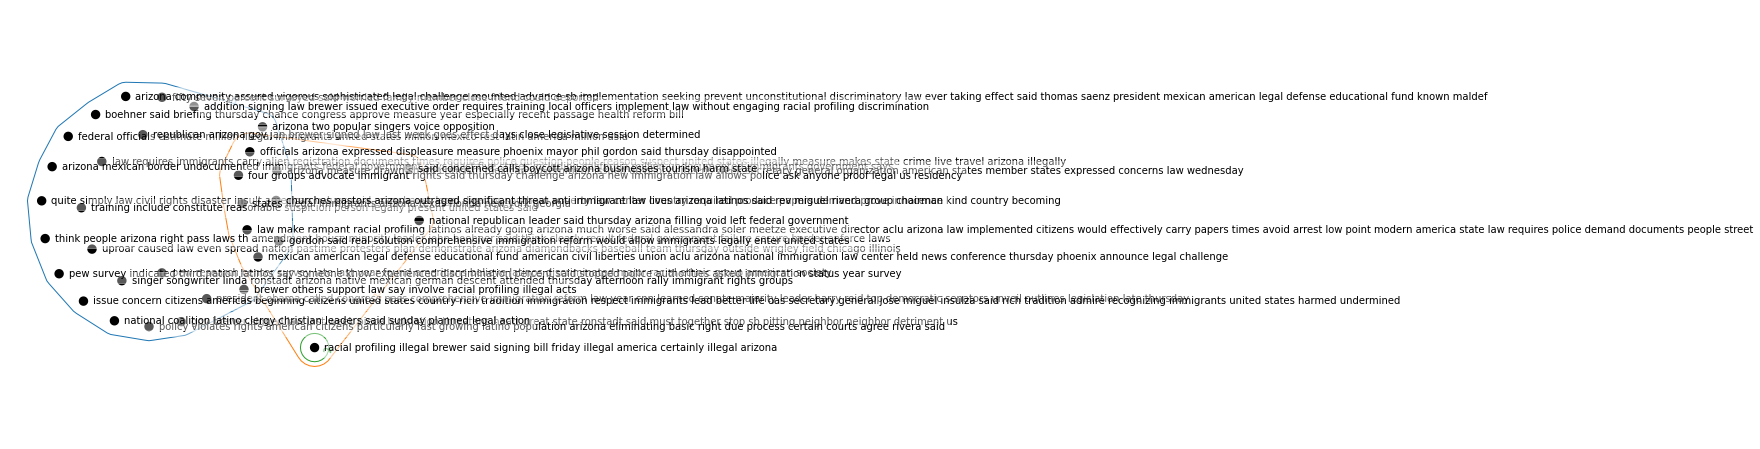

In [ ]:
hnx.draw(H)

In [ ]:
M_incidence = H.incidence_matrix()
M_incidence.toarray()

array([[1, 0, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 0]], dtype=int64)